<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Fashion_Clothe_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

In [3]:
# CNN expects N x H x W x C
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train.shape

(60000, 28, 28, 1)

In [4]:
# number of classes
K = len(set(y_train)) # set() which allowed to contain unique elements
K

10

In [10]:
x_train[0].shape

(28, 28, 1)

In [11]:
# Building the model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [12]:
# Compile
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7445 - loss: 0.6952 - val_accuracy: 0.8566 - val_loss: 0.3878
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.8627 - loss: 0.3676 - val_accuracy: 0.8699 - val_loss: 0.3434
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8801 - loss: 0.3132 - val_accuracy: 0.8749 - val_loss: 0.3308
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8945 - loss: 0.2758 - val_accuracy: 0.8913 - val_loss: 0.3069
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9065 - loss: 0.2478 - val_accuracy: 0.8948 - val_loss: 0.2947
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9150 - loss: 0.2254 - val_accuracy: 0.8969 - val_loss: 0.2945
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9209 - loss: 0.2085 - val_accuracy: 0.9028 - val_loss: 0.2838
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9271 -

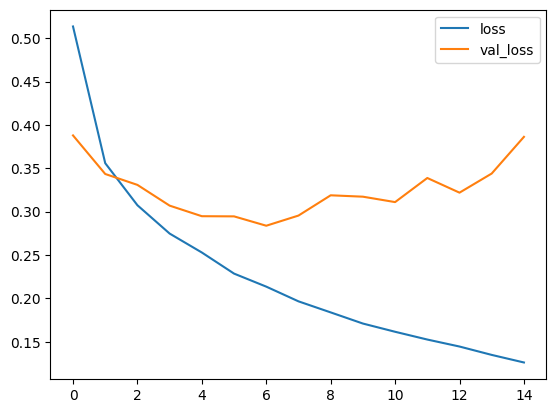

In [13]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

# It appears the model is overfitting a little bit since the validation loss is going up slightly

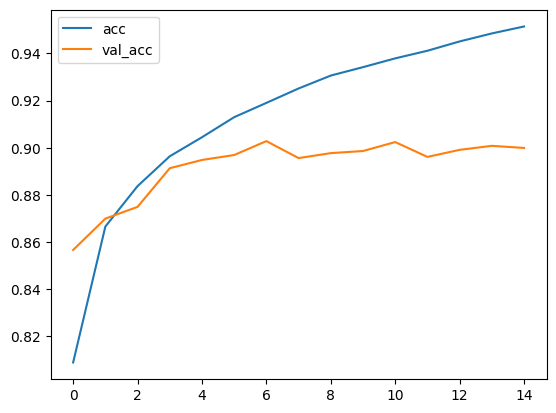

In [20]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend();

# The validation accuracy if more like steady.
# It's mean the model becoming more confident in its incorrect predictions.

In [15]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8982 - loss: 0.4039


[0.38619258999824524, 0.8999000191688538]

In [16]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.83      0.85      1000
           3       0.92      0.89      0.90      1000
           4       0.84      0.82      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.66      0.80      0.72      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



Confusion matrix:
[[817   1  19  15   5   1 137   0   5   0]
 [  2 972   0  13   3   0   9   0   1   0]
 [ 14   0 830  10  58   0  88   0   0   0]
 [ 11   7  18 889  36   2  37   0   0   0]
 [  1   0  40  11 823   0 124   0   1   0]
 [  0   0   0   2   0 976   1  15   0   6]
 [ 72   0  42  24  56   0 800   0   6   0]
 [  0   0   0   0   0   6   0 974   1  19]
 [  1   0   6   3   4   1  15   3 967   0]
 [  0   0   0   0   0   6   1  41   1 951]]


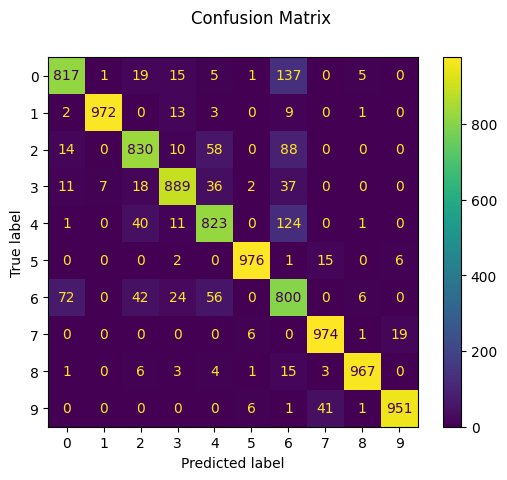

In [18]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

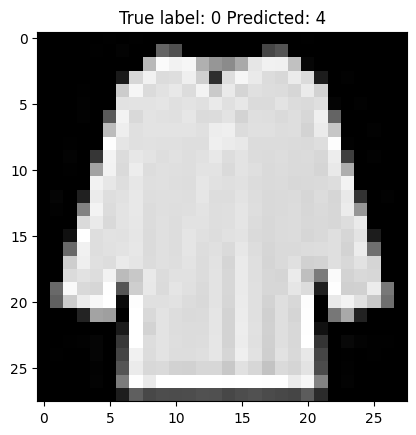

In [21]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True label: {y_test[i]} Predicted: {y_pred[i]}");